In [98]:
import pandas as pd
import numpy as np


데이터 로드

In [99]:
# df_a = pd.read_excel('C:\\google_drive\\업무\\0_EDA 진행\\MEE_실시간테스트_통합데이터_v0.xlsx',sheet_name = 'Raw_data_B',index_col=0)
df_a = pd.read_excel('C:\\google_drive\\업무\\0_EDA 진행\\MEE_실시간테스트_통합데이터_v0.xlsx',sheet_name = 'Raw_data_B',header=1,index_col=0)
# df_a = pd.read_excel('C:\\google_drive\\업무\\0_EDA 진행\\MEE_실시간테스트_통합데이터_v0.xlsx',sheet_name = 'Raw_data_B')

df_a

,recognize_info_id,화남,불쾌,두려움,즐거움,슬픔,놀람,덤덤,category,emotion_basic_score,...,category.1,emotion_val_score,보통,집중,몰입,category.2,bpm,focus_score,study_score,category.3
put_seq,,,,,,,,,,,,,,,,,,,,,
1,42,1.081335e-08,0.000020,0.000929,0.000091,0.074150,0.000090,0.924721,7,-1,...,0,2,0.0,0.0,0.0,-1,0,-1,NaN,NaN
2,42,1.234483e-06,0.000036,0.002166,0.000669,0.924749,0.000019,0.072358,5,-1,...,0,2,0.0,0.0,0.0,-1,0,-1,NaN,NaN
3,42,6.254392e-08,0.000050,0.001676,0.000142,0.421463,0.000260,0.576409,7,-1,...,0,3,0.0,0.0,0.0,-1,0,-1,NaN,NaN
4,42,3.570800e-07,0.000713,0.003150,0.001396,0.787552,0.000170,0.207017,5,-1,...,0,2,0.0,0.0,0.0,-1,0,-1,NaN,NaN
5,42,1.331090e-07,0.000006,0.029214,0.000395,0.523309,0.000383,0.446692,5,-1,...,0,2,0.0,0.0,0.0,-1,0,-1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,170,-1.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1,-1,...,0,4,-1.0,-1.0,-1.0,1,-1,34,27.0,1.0
334,170,-1.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1,-1,...,0,1,-1.0,-1.0,-1.0,1,-1,34,28.0,1.0
335,170,-1.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1,-1,...,2,89,-1.0,-1.0,-1.0,1,-1,32,24.0,1.0


In [100]:
ids=df_a["recognize_info_id"]
ids=list(set(map(int,ids)))
ids.sort()
ids #recognize_info_id 모음

[42,
 46,
 66,
 67,
 77,
 79,
 94,
 96,
 97,
 98,
 108,
 110,
 111,
 112,
 113,
 116,
 126,
 139,
 140,
 167,
 168,
 169,
 170]

In [101]:
df_data_list = list()
df_data_dict = dict()

for i in ids:
    value = df_a[df_a['recognize_info_id'] == i]
    df_data_list.append(value)
    df_data_dict[i]=value
print(len(df_data_list))
print(df_data_dict[ids[0]])#순서상 첫번째인 id = 42번에 대해서 출력

23
         recognize_info_id            화남            불쾌       두려움       즐거움  \
put_seq                                                                      
1                       42  1.081335e-08  1.964249e-05  0.000929  0.000091   
2                       42  1.234483e-06  3.645129e-05  0.002166  0.000669   
3                       42  6.254392e-08  4.966335e-05  0.001676  0.000142   
4                       42  3.570800e-07  7.127646e-04  0.003150  0.001396   
5                       42  1.331090e-07  6.118932e-06  0.029214  0.000395   
...                    ...           ...           ...       ...       ...   
362                     42  1.576921e-06  7.508875e-05  0.004424  0.001382   
363                     42  1.855282e-07  2.048521e-04  0.001094  0.005383   
364                     42  4.297345e-06  7.884295e-04  0.001119  0.004580   
365                     42  1.842147e-07  9.107685e-04  0.006766  0.024526   
366                     42  1.677677e-09  5.547165e-07  0.001

#### 기초통계량 (평균, 표준 편차, 중위, 최대, 최소)

In [102]:
columns_list = ['emotion_val_score', 'focus_score', 'study_score']

In [103]:
def basic_statistics_1 (df, columns_list):
    
    list = []
    
    for column in columns_list:
        
        drop_index = df[df[column] == -1].index
        print(drop_index)
        drop_df = df.drop(index = drop_index)
        
        mean   = round(drop_df[column].mean(),1)
        std    = round(drop_df[column].std(),1)
        median = round(drop_df[column].median(),1)
        min    = round(drop_df[column].min(),1)
        max    = round(drop_df[column].max(),1)
        
        basic_statistics = [mean, std, median, min, max]
        
        list.extend(basic_statistics)
    
    return list

In [104]:

df_list_B= df_data_list

test_list = []

for df in df_list_B:
    
    test = basic_statistics_1(df, columns_list)
    
    test_list.append(test)

new_columns = ['mean', 'std', 'median', 'min', 'max']*3
new_df = pd.DataFrame(test_list, columns = new_columns)
new_df.to_csv('기초통계량_total_1_B.csv', sep=',', index=False)

new_df

Int64Index([118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
            131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
            144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
            157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
            170, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227,
            228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240,
            316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328,
            329, 330],
           dtype='int64', name='put_seq')
Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            321, 322, 323, 324, 325, 326, 327, 328, 329, 330],
           dtype='int64', name='put_seq', length=143)
Int64Index([], dtype='int64', name='put_seq')
Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  73,  74,  88,
             89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
 

C:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,mean,std,median,min,max,mean,std,median,min,max,mean,std,median,min,max
0,22.7,30.2,5.0,0,98,0.5,0.6,0.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN
1,28.9,25.5,22.0,1,98,0.4,0.6,0.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN
2,19.2,21.8,14.0,1,98,0.5,0.8,0.0,0.0,4.0,23.3,2.6,23.0,13.0,30.0
3,23.6,28.0,9.0,1,98,0.4,0.5,0.0,0.0,2.0,25.0,3.9,23.0,22.0,33.0
4,30.8,35.6,8.0,1,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,18.5,33.3,2.0,2,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,9.9,22.9,3.0,0,98,0.8,2.3,0.0,0.0,15.0,22.0,2.0,22.0,12.0,27.0
7,17.2,33.8,2.0,1,98,1.2,1.9,1.0,0.0,8.0,22.4,0.8,22.0,22.0,25.0
8,36.1,46.0,3.0,1,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,33.0,44.5,3.0,1,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
result=df_a.groupby("recognize_info_id").describe()
# print(result)
result
# result.to_csv("C:\\google_drive\\업무\\0_EDA 진행\\describe_1.csv")

화남                                                  \
                   count      mean       std           min           25%   
recognize_info_id                                                          
42                 366.0  0.026008  0.087827  1.095694e-09  7.967069e-07   
46                 261.0  0.071757  0.177700  0.000000e+00  9.802789e-05   
66                 174.0 -0.018673  0.175114 -1.000000e+00  2.192574e-06   
67                 109.0  0.117156  0.244664  4.177521e-07  1.866987e-05   
77                  27.0  0.000111  0.000245  1.655704e-08  3.902995e-07   
79                  37.0  0.000225  0.000376  2.991685e-07  2.975441e-06   
94                 256.0 -0.022268  0.185280 -1.000000e+00  6.837027e-08   
96                 164.0 -0.244118  0.494304 -1.000000e+00 -1.000000e+00   
97                  66.0 -0.302959  0.463137 -1.000000e+00 -1.000000e+00   
98                  70.0 -0.312491  0.468924 -1.000000e+00 -1.000000e+00   
108                 67.0 -0.321076  0.479518 -1.000000e+00 -1.000000e+00   
110                167.0 -0.306977  0.548249 -1.000000e+00 -1.000000e+00   
111                181.0  0.002331  0.022678  2.324106e-07  1.505134e-05   
112                145.0  0.018310  0.081003  3.755702e-07  1.562974e-04   
113                220.0 -0.142807  0.355270 -1.000000e+00  8.095948e-06   
116                512.0 -0.061094  0.421898 -1.000000e+00  1.136698e-05   
126                232.0 -0.146037  0.354647 -1.000000e+00  8.817218e-08   
139                231.0 -0.124459  0.332486 -1.000000e+00  8.361951e-07   
140                520.0 -0.120087  0.352973 -1.000000e+00  4.208262e-06   
167                336.0 -0.038402  0.193247 -1.000000e+00  4.369059e-08   
168                333.0 -0.036034  0.186661 -1.000000e+00  9.156889e-08   
169                335.0 -0.041697  0.200431 -1.000000e+00  8.451281e-08   
170                337.0 -0.043958  0.223635 -1.000000e+00  5.142323e-07   

                                                        불쾌            ...  \
                            50%       75%       max  count      mean  ...   
recognize_info_id                                                     ...   
42                 4.837645e-05  0.000548  0.937738  366.0  0.097029  ...   
46                 5.515059e-04  0.013666  0.738298  261.0  0.075279  ...   
66                 3.283262e-05  0.000324  0.415861  174.0  0.099892  ...   
67                 2.605046e-03  0.079417  0.902609  109.0  0.133890  ...   
77                 2.589239e-06  0.000027  0.000884   27.0  0.051378  ...   
79                 2.237061e-05  0.000246  0.001454   37.0  0.081580  ...   
94                 2.373896e-06  0.000299  0.685842  256.0  0.124742  ...   
96                 9.108545e-05  0.002560  0.982630  164.0 -0.193967  ...   
97                 4.842807e-08  0.000052  0.000993   66.0 -0.289141  ...   
98                 1.590288e-05  0.000372  0.087344   70.0 -0.250359  ...   
108                1.484352e-05  0.000086  0.259449   67.0 -0.310500  ...   
110                1.905378e-05  0.002150  0.918961  167.0 -0.333342  ...   
111                6.328563e-05  0.000186  0.302244  181.0  0.000075  ...   
112                1.337543e-03  0.006932  0.751270  145.0  0.272172  ...   
113                4.373036e-05  0.000182  0.264440  220.0 -0.008410  ...   
116                6.488886e-04  0.013484  0.989409  512.0 -0.007260  ...   
126                1.867546e-06  0.000305  0.038905  232.0 -0.127626  ...   
139                5.713209e-05  0.000617  0.046741  231.0 -0.028493  ...   
140                1.530202e-04  0.002483  0.892271  520.0  0.014528  ...   
167                1.976629e-07  0.000001  0.075296  336.0 -0.034450  ...   
168                3.740669e-07  0.000001  0.000321  333.0 -0.026367  ...   
169                1.843322e-06  0.000019  0.005413  335.0 -0.039155  ...   
170                6.512837e-06  0.000205  0.339631  337.0 -0.043515  ...   

                  study_score       catego

In [106]:
from matplotlib import pyplot as plt

%matplotlib inline

import seaborn as sns
sns.set()

C:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='category'>

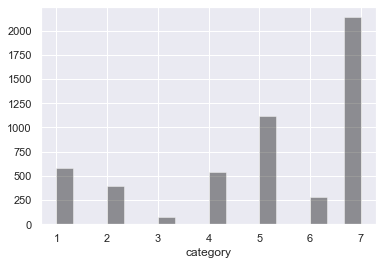

In [107]:
sns.distplot(df_a["category"],color="black", kde=False)



<AxesSubplot:xlabel='emotion_val_score'>

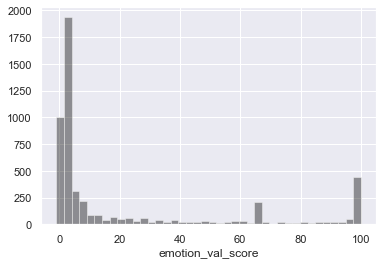

In [108]:
sns.distplot(df_a["emotion_val_score"],color="black", kde=False)


<AxesSubplot:xlabel='focus_score'>

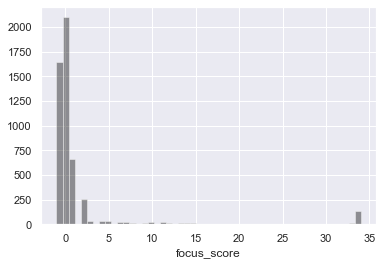

In [109]:
sns.distplot(df_a["focus_score"],color="black", kde=False)


<AxesSubplot:xlabel='study_score'>

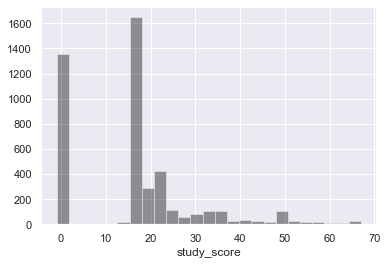

In [110]:
sns.distplot(df_a["study_score"],color="black", kde=False)


<AxesSubplot:>

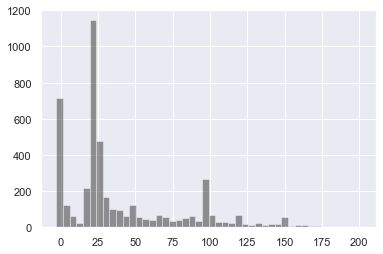

In [111]:
sns.distplot(df_a["emotion_val_score"]+df_a["focus_score"]+df_a["study_score"],color="black", kde=False)

C:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='category'>

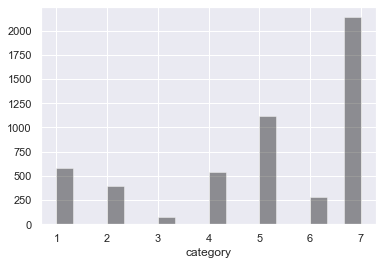

In [ ]:
# sns.distplot(df_a["category"],color="black", kde=False)



C:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 53132 (\N{HANGUL SYLLABLE KWAE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 46160 (\

ValueError: cannot reindex on an axis with duplicate labels

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53132 (\N{HANGUL SYLLABLE KWAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) miss

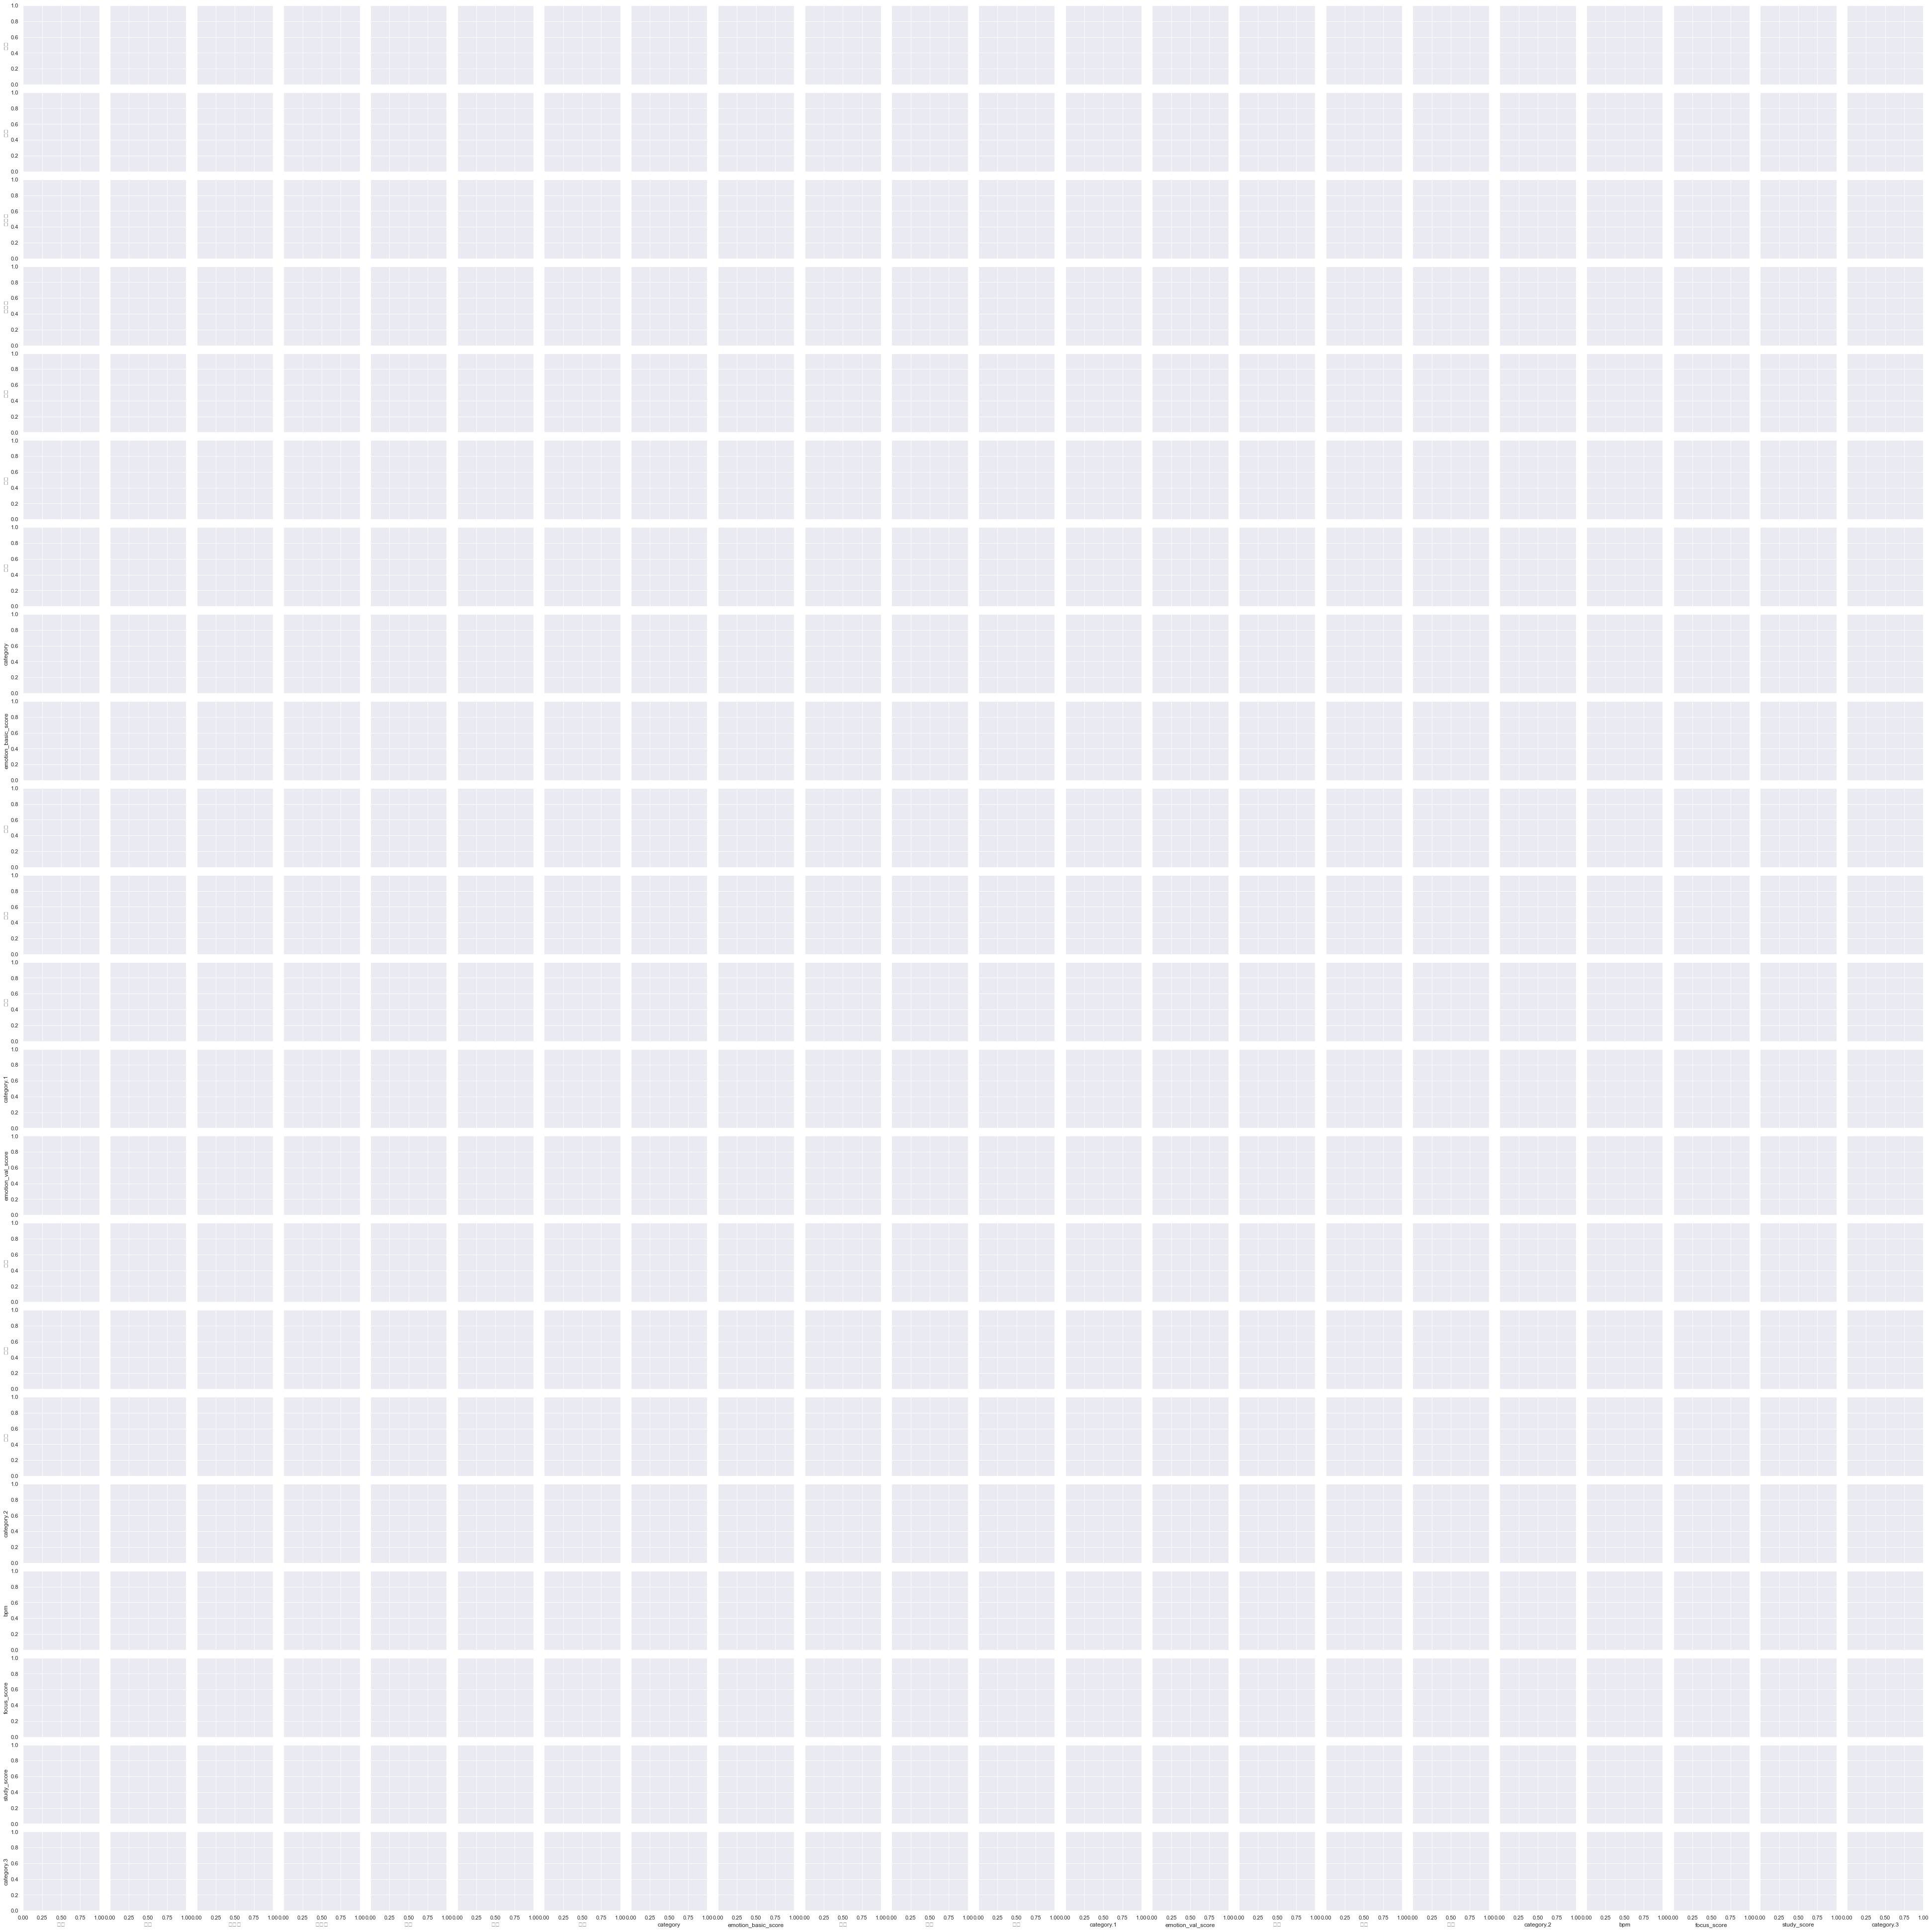

In [113]:
sns.pairplot(df_a[:1000], hue="recognize_info_id", palette="gray")